In [3]:
from useful_scripts import data_utils as utils # replace
from datetime import datetime as dt
import pandas as pd
import xarray as xr
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
bucket_name = 'sundai-satellite-data'
site = 'US-AR1'

modis_path = f'gs://{bucket_name}/modis_v2/modis_{site}.nc' # 500m resolution daily
landsat_path = f'gs://{bucket_name}/landsat_v2/landsat_{site}.nc' # 30m resolution 14-day
embeddings_path = f'gs://{bucket_name}/embeddings/alpha_earth_{site}.nc' # 10m resolution annual

In [5]:
modis = utils.load_dataset(modis_path)
landsat = utils.load_dataset(landsat_path)
embeddings = utils.load_dataset(embeddings_path)

In [6]:
# What variable did we actually use?
print("Landsat var:", list(landsat.data_vars))
print("MODIS   var:", list(modis.data_vars))
print("AE      var:", list(embeddings.data_vars))

# Show attrs for the chosen variables
def show_attrs(ds, v=None):
    if v is None: v = list(ds.data_vars)[0]
    da = ds[v]
    print(f"\n[{v}] dims={da.dims} shape={da.shape}")
    for k in ("long_name","standard_name","units","scale_factor","add_offset","valid_range"):
        if k in da.attrs: print(f"  {k}: {da.attrs[k]}")
show_attrs(landsat); show_attrs(modis); show_attrs(embeddings)

Landsat var: ['blue', 'green', 'red', 'nir08', 'swir16', 'swir22', 'cloud_cover']
MODIS   var: ['blue', 'green', 'red', 'nir08', 'swir16', 'swir22']
AE      var: ['embedding']

[blue] dims=('time', 'y', 'x') shape=(639, 96, 107)

[blue] dims=('time', 'y', 'x') shape=(8389, 96, 107)

[embedding] dims=('time', 'band', 'y', 'x') shape=(8, 64, 96, 107)
  long_name: ['A00', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63']


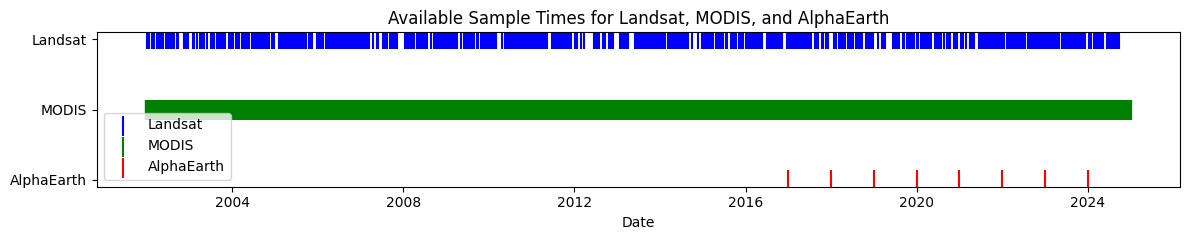

In [7]:
# Visualize available sample times for Landsat, MODIS, and AlphaEarth
landsat_times = pd.to_datetime(landsat.time.values)
modis_times = pd.to_datetime(modis.time.values)
ae_times = pd.to_datetime(embeddings.time.values)

plt.figure(figsize=(12, 2.5))
plt.scatter(landsat_times, [1]*len(landsat_times), color='blue', label='Landsat', marker='|', s=200)
plt.scatter(modis_times, [0.8]*len(modis_times), color='green', label='MODIS', marker='|', s=200)
plt.scatter(ae_times, [0.6]*len(ae_times), color='red', label='AlphaEarth', marker='|', s=200)
plt.yticks([0.6, 0.8, 1], ['AlphaEarth', 'MODIS', 'Landsat'])
plt.xlabel('Date')
plt.title('Available Sample Times for Landsat, MODIS, and AlphaEarth')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:22: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  return da.to_series().resample("AS").mean()
/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:101: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  E_D = Ey.reindex(pd.date_range(start, end, freq="AS"), method="ffill").reindex(idxD, method="ffill")


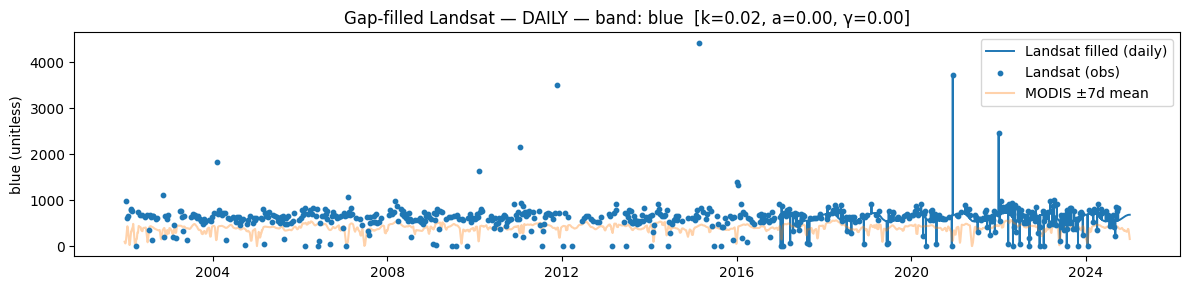

/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:22: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  return da.to_series().resample("AS").mean()
/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:101: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  E_D = Ey.reindex(pd.date_range(start, end, freq="AS"), method="ffill").reindex(idxD, method="ffill")


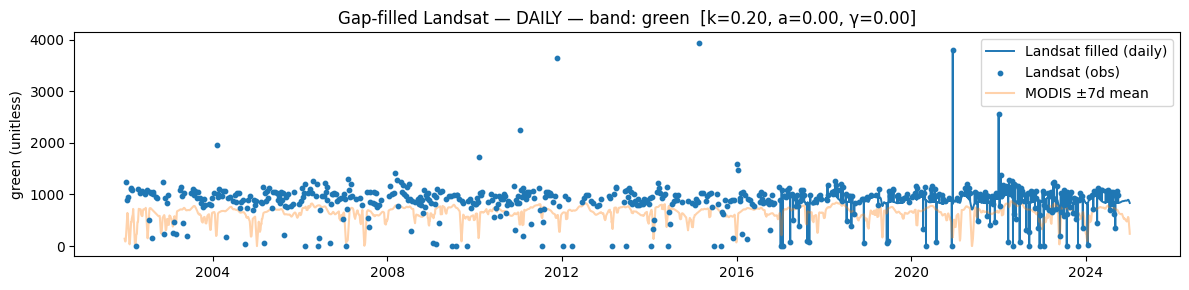

/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:22: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  return da.to_series().resample("AS").mean()
/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:101: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  E_D = Ey.reindex(pd.date_range(start, end, freq="AS"), method="ffill").reindex(idxD, method="ffill")


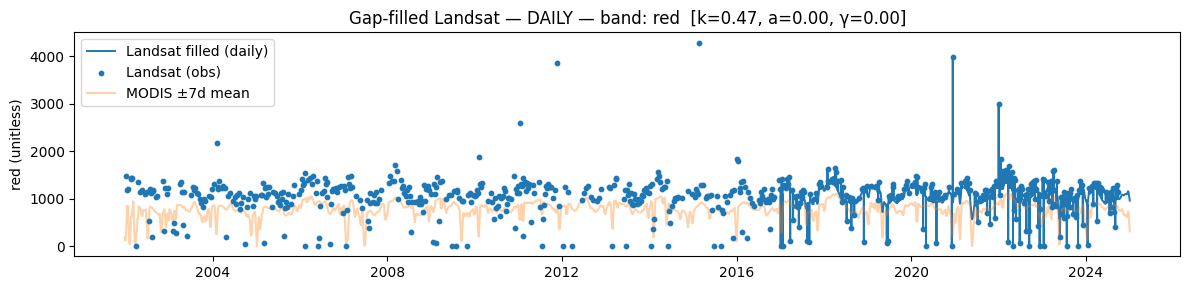

/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:22: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  return da.to_series().resample("AS").mean()
/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:101: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  E_D = Ey.reindex(pd.date_range(start, end, freq="AS"), method="ffill").reindex(idxD, method="ffill")


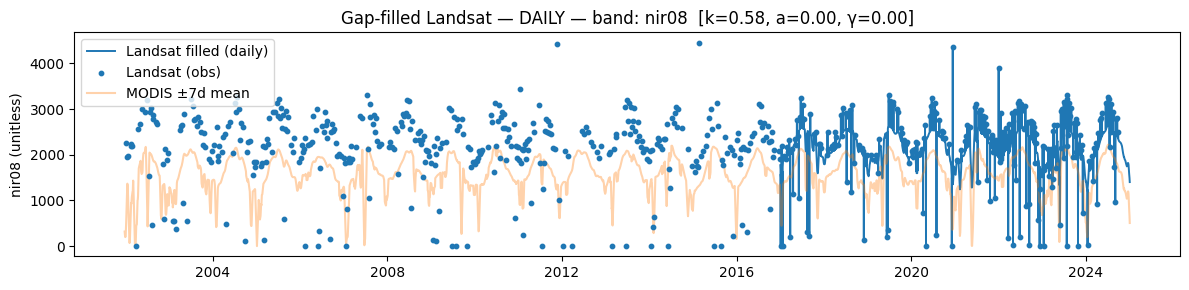

/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:22: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  return da.to_series().resample("AS").mean()
/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:101: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  E_D = Ey.reindex(pd.date_range(start, end, freq="AS"), method="ffill").reindex(idxD, method="ffill")


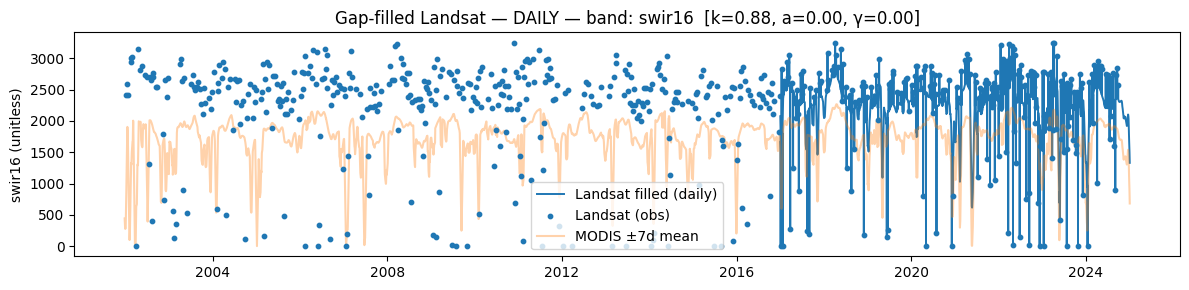

/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:22: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  return da.to_series().resample("AS").mean()
/var/folders/td/bl53m3795jddfk6py9kdy83c0000gn/T/ipykernel_91390/2366006554.py:101: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  E_D = Ey.reindex(pd.date_range(start, end, freq="AS"), method="ffill").reindex(idxD, method="ffill")


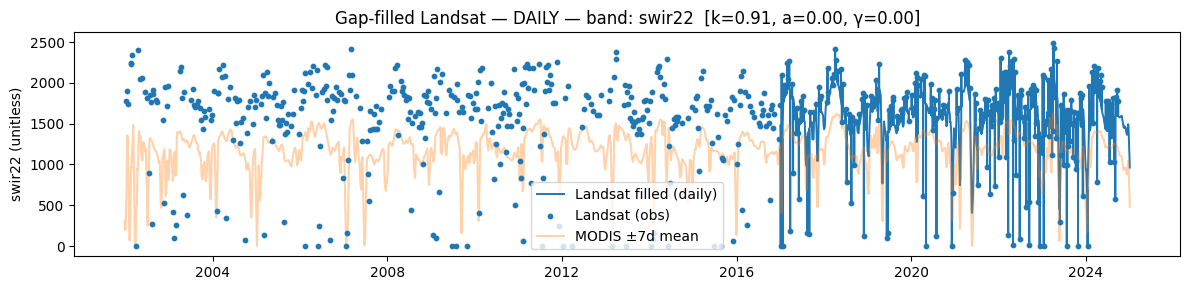

In [26]:
import numpy as np, pandas as pd, xarray as xr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

BANDS = ["blue","green","red","nir08","swir16","swir22"]

# ---------- helpers ----------
def to_physical(da):
    sf  = float(da.attrs.get("scale_factor", 1.0))
    off = float(da.attrs.get("add_offset", 0.0))
    return (da.astype("float32") * sf) + off

def site_series(ds, band):
    """Spatial mean over (y,x) → pandas Series indexed by time."""
    da = to_physical(ds[band])
    other = [d for d in da.dims if d != "time"]
    return da.mean(other).to_series()

def ae_year_series(embeddings_ds):
    """Scalar AE per year: mean over (band,y,x) then yearly."""
    da = embeddings_ds["embedding"].mean(("band","y","x"))
    return da.to_series().resample("AS").mean()

def seasonal_mu_fourier(series, target_idx, order=3):
    """Fit μ(doy) with a short Fourier series and evaluate on target_idx."""
    s = series.dropna()
    if len(s) == 0:
        return pd.Series(index=target_idx, dtype=float)

    def X_from_doy(d):
        mats = [np.ones_like(d)]
        for h in range(1, order+1):
            mats.append(np.sin(2*np.pi*h*d/365.25))
            mats.append(np.cos(2*np.pi*h*d/365.25))
        return np.column_stack(mats)

    d_fit = s.index.dayofyear.values.astype(float)
    beta = np.linalg.lstsq(X_from_doy(d_fit), s.values, rcond=None)[0]

    d_tgt = target_idx.dayofyear.values.astype(float)
    mu = X_from_doy(d_tgt) @ beta
    return pd.Series(mu, index=target_idx)

def modis_window_daily(target_idx, Ms, window_days=7):
    """Centered ±window_days rolling mean of daily MODIS, returned on target_idx."""
    s = Ms.asfreq("D").interpolate(limit_direction="both")
    win = 2*window_days + 1
    s_roll = s.rolling(win, center=True, min_periods=1).mean()
    # reindex exactly to the requested (daily) index
    return s_roll.reindex(target_idx, method="nearest")

# ---------- main ----------
def fill_one_band_daily(landsat, modis, embeddings, band,
                        fourier_order=3, window_days=7):
    # site means
    Ls = site_series(landsat, band)
    Ms = site_series(modis,   band)
    Ey = ae_year_series(embeddings)

    # daily target timeline (full MODIS span; starts at min of L/M)
    start = min(Ls.index.min(), Ms.index.min()).normalize()
    end   = max(Ls.index.max(), Ms.index.max())
    idxD  = pd.date_range(start, end, freq="D")

    # seasonal baselines on DAILY index
    muL_D = seasonal_mu_fourier(Ls, idxD, order=fourier_order)
    muM_D = seasonal_mu_fourier(Ms, idxD, order=fourier_order)

    # MODIS ±7d windowed mean on DAILY index
    Mwin_D = modis_window_daily(idxD, Ms, window_days=window_days)

    # ---- fit k, a, gamma using OVERLAP at true Landsat times ----
    # evaluate μ and Mwin on Landsat timestamps
    muL_obs = muL_D.reindex(Ls.index)
    muM_obs = muM_D.reindex(Ls.index)
    Mwin_obs = modis_window_daily(Ls.index, Ms, window_days=window_days)

    AL = (Ls - muL_obs).dropna()
    AM = (Mwin_obs - muM_obs).reindex(AL.index)

    k = 0.0
    if len(AM) and AM.std() > 0:
        k = float((AL*AM).sum() / (AM*AM).sum())

    resid = (AL - k*AM)
    Ry = resid.groupby(resid.index.year).mean()

    Ey_year = Ey  # already indexed by year start
    df = pd.DataFrame({"R": Ry}).join(Ey_year.rename("E")).dropna()

    if len(df) >= 2 and df["E"].std() > 0:
        lr = LinearRegression().fit(df[["E"]], df["R"])
        a, gamma = float(lr.intercept_), float(lr.coef_[0])
    elif len(df) >= 1:
        a, gamma = float(df["R"].mean()), 0.0
    else:
        a, gamma = 0.0, 0.0

    # ---- predict DAILY ----
    # yearly AE carried across days
    E_D = Ey.reindex(pd.date_range(start, end, freq="AS"), method="ffill").reindex(idxD, method="ffill")

    L_pred_D = muL_D + k*(Mwin_D - muM_D).fillna(0) + (a + gamma*E_D)

    # keep observed Landsat on their exact days
    L_obs_D = pd.Series(index=idxD, dtype=float)
    L_obs_D.loc[Ls.index] = Ls.values
    L_filled_D = L_obs_D.combine_first(L_pred_D)

    # axis label
    long = landsat[band].attrs.get("long_name", band)
    units = landsat[band].attrs.get("units", "unitless")
    ylabel = f"{long} ({units})"

    return idxD, L_filled_D, Ls, Mwin_D, ylabel, dict(k=k, a=a, gamma=gamma)

# ---------- per-band plots ----------
for b in BANDS:
    idxD, LfilledD, Lobs, MwinD, ylabel, pars = fill_one_band_daily(landsat, modis, embeddings, b)
    plt.figure(figsize=(12,3))
    plt.plot(idxD, LfilledD, label="Landsat filled (daily)", lw=1.4)
    plt.scatter(Lobs.index, Lobs, s=10, label="Landsat (obs)", zorder=3)
    plt.plot(idxD, MwinD, alpha=0.35, label="MODIS ±7d mean")
    plt.title(f"Gap-filled Landsat — DAILY — band: {b}  [k={pars['k']:.2f}, a={pars['a']:.2f}, γ={pars['gamma']:.2f}]")
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Per-pixel daily gap-fill + 1-month video (drop-in code)

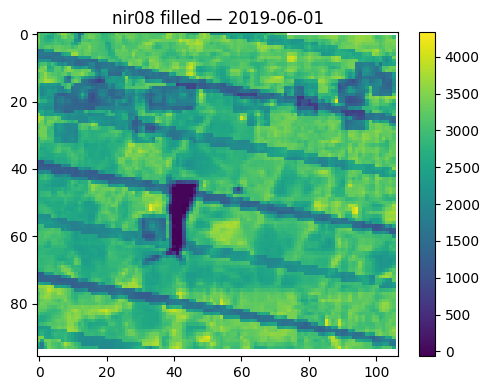

Wrote gapfill_filled_nir08_201906.gif
Wrote gapfill_obs_nir08_201906.gif
Wrote gapfill_filled_nir08_201906.mp4
Wrote gapfill_obs_nir08_201906.mp4


In [13]:
import numpy as np, pandas as pd, xarray as xr
import matplotlib.pyplot as plt

# GIF writer (v3 ok)
import imageio.v3 as iio
# MP4 writer (use v2 API for get_writer)
import imageio.v2 as iio_v2

import matplotlib as mpl

# ---- CONFIG ----
band = "nir08"                  # choose from: blue, green, red, nir08, swir16, swir22
month_start = "2019-06-01"      # inclusive
month_end   = "2019-06-30"      # inclusive
win_days = 7                    # MODIS ±win_days window
tiny = 1e-12

# ---- HELPERS ----
def to_physical(da, default_scale=None, default_offset=0.0):
    sf  = float(da.attrs.get("scale_factor", default_scale if default_scale is not None else 1.0))
    off = float(da.attrs.get("add_offset", default_offset))
    return (da.astype("float32") * sf) + off

def doy_full_climo(da):
    """
    da: DataArray(time, y, x)
    returns DOY climatology per pixel with all 1..366 filled, dims (dayofyear, y, x)
    """
    cl = da.groupby("time.dayofyear").mean("time", skipna=True)
    # ensure all doys present and interpolate along 'dayofyear'
    doys = xr.DataArray(np.arange(1, 367), dims=["dayofyear"])
    cl = cl.reindex(dayofyear=doys)
    cl = cl.interpolate_na("dayofyear", method="linear", fill_value="extrapolate")
    return cl

def year_mean(da):
    """Mean by calendar year (works on time,*,*). Returns dims (year, ...)."""
    return da.groupby("time.year").mean("time", skipna=True)

def pad_even(rgb):
    """Pad 1px if needed so H and W are even (some codecs require it)."""
    h, w, _ = rgb.shape
    ph, pw = h % 2, w % 2
    if ph or pw:
        rgb = np.pad(rgb, ((0, ph), (0, pw), (0, 0)), mode="edge")
    return rgb

# ---- 1) PREP BANDS IN PHYSICAL UNITS (per pixel) ----
L = to_physical(landsat[band])            # (time, y, x)
M = to_physical(modis[band])              # (time, y, x)

# AlphaEarth → per-pixel yearly scalar (mean over 'band'), dims (time, y, x) → (year, y, x)
AE_pix = embeddings["embedding"].mean("band")  # (time, y, x)
AEy = year_mean(AE_pix)                        # (year, y, x)

# ---- 2) DAILY MODIS + ±7d window per pixel ----
M_daily = M.resample(time="1D").interpolate("linear")
Mwin = M_daily.rolling(time=2*win_days+1, center=True, min_periods=1).mean()  # (time, y, x)

# ---- 3) DOY CLIMATOLOGIES per pixel (fast & robust) ----
muL_doy = doy_full_climo(L)       # (dayofyear, y, x)
muM_doy = doy_full_climo(Mwin)    # (dayofyear, y, x)

# ---- 4) Fit per-pixel k from overlapping Landsat times ----
muL_on_L = muL_doy.sel(dayofyear=L["time"].dt.dayofyear)        # (time, y, x)
muM_on_L = muM_doy.sel(dayofyear=L["time"].dt.dayofyear)        # (time, y, x)
Mwin_on_L = Mwin.sel(time=L["time"], method="nearest")          # (time, y, x)

AL = L - muL_on_L                                               # (time, y, x)
AM = Mwin_on_L - muM_on_L                                       # (time, y, x)

num = (AL * AM).sum("time", skipna=True)                        # (y, x)
den = (AM ** 2).sum("time", skipna=True)                        # (y, x)
k = xr.where(den > tiny, num / den, 0.0)                        # (y, x)

# ---- 5) Per-pixel year residuals & AE regression (a, gamma) ----
resid = (AL - k * AM)                                           # (time, y, x)
Ry = year_mean(resid)                                           # (year, y, x)

common_years = np.intersect1d(Ry["year"].values, AEy["year"].values)
Ry2 = Ry.sel(year=common_years)
AEy2 = AEy.sel(year=common_years)

mean_E = AEy2.mean("year")
mean_R = Ry2.mean("year")
cov_ER = ((AEy2 - mean_E) * (Ry2 - mean_R)).mean("year")
var_E = ((AEy2 - mean_E) ** 2).mean("year")

gamma = xr.where(var_E > tiny, cov_ER / var_E, 0.0)             # (y, x)
a = (mean_R - gamma * mean_E)                                   # (y, x)

# ---- 6) DAILY PREDICTION for the target month (per pixel) ----
target = pd.date_range(month_start, month_end, freq="D")

# day-of-year indexer WITH datetime 'time' coord
doy_target = xr.DataArray(pd.Index(target).dayofyear,
                          dims=["time"],
                          coords={"time": pd.DatetimeIndex(target)})

muL_daily = muL_doy.sel(dayofyear=doy_target)      # (time,y,x) with datetime 'time'
muM_daily = muM_doy.sel(dayofyear=doy_target)      # (time,y,x)
Mwin_tgt  = Mwin.sel(time=target)                  # (time,y,x)

# year indexer WITH datetime 'time' coord
years_target = xr.DataArray(pd.Index(target).year,
                            dims=["time"],
                            coords={"time": pd.DatetimeIndex(target)})

AE_daily = AEy.sel(year=years_target)                                # (time,y,x) with year coord
AE_daily = AE_daily.assign_coords(time=("time", pd.DatetimeIndex(target)))  # reattach datetime

# Prediction
L_pred_daily = muL_daily + k * (Mwin_tgt - muM_daily) + (a + gamma * AE_daily)

# Keep observed Landsat if exactly on those days
L_obs_on_target = L.reindex(time=target)                        # NaN except exact Landsat dates
L_filled_daily = xr.where(~xr.ufuncs.isnan(L_obs_on_target), L_obs_on_target, L_pred_daily)

# ---- 7) QUICK STATIC CHECK (one day) ----
example_day = str(target[0].date())
plt.figure(figsize=(5,4))
im = plt.imshow(L_filled_daily.sel(time=example_day), origin="upper")
plt.title(f"{band} filled — {example_day}")
plt.colorbar(im, fraction=0.046)
plt.tight_layout(); plt.show()

# ---- 8) MAKE 1-MONTH GIFs/MP4s: pre-fill vs filled ----
# Colormap (new API) and robust normalization from the filled cube for comparability
cmap = mpl.colormaps.get("viridis")
vmin = float(np.nanpercentile(L_filled_daily.values, 2))
vmax = float(np.nanpercentile(L_filled_daily.values, 98))

def to_rgb(arr, vmin, vmax, nan_rgb=(200,200,200)):
    norm = (arr - vmin) / (vmax - vmin + 1e-12)
    rgb = (cmap(np.clip(norm, 0, 1))[..., :3] * 255).astype(np.uint8)
    if np.isnan(arr).any():
        mask = ~np.isfinite(arr)
        rgb[mask] = np.array(nan_rgb, dtype=np.uint8)
    return pad_even(rgb)

frames_filled, frames_obs = [], []
for t in target:
    arr_f = L_filled_daily.sel(time=t).values
    arr_o = L_obs_on_target.sel(time=t).values
    frames_filled.append(to_rgb(arr_f, vmin, vmax))
    frames_obs.append(to_rgb(arr_o, vmin, vmax))  # shows gray where missing

# Save GIFs (~5 fps)
base = f"{pd.to_datetime(month_start).strftime('%Y%m')}"
gif_filled = f"gapfill_filled_{band}_{base}.gif"
gif_obs    = f"gapfill_obs_{band}_{base}.gif"
iio.imwrite(gif_filled, frames_filled, duration=0.2, loop=0)
iio.imwrite(gif_obs,    frames_obs,    duration=0.2, loop=0)
print("Wrote", gif_filled)
print("Wrote", gif_obs)

# Save MP4s (needs: pip install -U imageio imageio-ffmpeg; or brew install ffmpeg)
mp4_filled = f"gapfill_filled_{band}_{base}.mp4"
mp4_obs    = f"gapfill_obs_{band}_{base}.mp4"
try:
    with iio_v2.get_writer(mp4_filled, fps=5, codec="libx264", macro_block_size=None) as w:
        for rgb in frames_filled:
            w.append_data(rgb)
    with iio_v2.get_writer(mp4_obs, fps=5, codec="libx264", macro_block_size=None) as w:
        for rgb in frames_obs:
            w.append_data(rgb)
    print("Wrote", mp4_filled)
    print("Wrote", mp4_obs)
except Exception as e:
    print("MP4 write failed (install imageio-ffmpeg or ffmpeg). Error:", e)
